In [1]:
## importing lbiraries & data

# import libraries
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "../Datasets"

import os
#Actual absolute path
cwd = os.getcwd()
#print(cwd)

In [3]:
# one level up directory. Datasets directory
os.chdir(path)
#Actual absolute path
cwd = os.getcwd()
#print(cwd)

In [4]:
# path file current dir + file name
path_file = cwd + '/new_churn_data.csv'
#print(path_file)

In [5]:
# import dataset

dataset = pd.read_csv(path_file)
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [6]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'ios_user', 'android_user', 'registered_phones',
       'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'zodiac_sign', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred'],
      dtype='object')

In [7]:
dataset.shape # 31 x columns - 27000 records

(26996, 28)

In [8]:
## Data preparation 
user_identifier = dataset['user']

#Remove the user from the dataset
dataset.drop(columns = ['user'])

,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,0,37.0,na,0,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,0,28.0,R,0,0,1,0,0,96,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,0,35.0,R,47,2,86,47,0,285,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,0,26.0,R,26,3,38,25,0,74,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,1,27.0,na,0,0,2,0,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0
5,1,32.0,R,5,3,111,5,0,227,0,...,Bi-Weekly,0,0,0,0,Taurus,0,0,1.83,0
6,0,21.0,na,0,0,4,0,0,0,0,...,Bi-Weekly,0,0,0,0,Cancer,0,0,0.07,0
7,0,24.0,na,0,0,2,0,0,0,0,...,na,0,0,0,0,Leo,0,0,0.11,0
8,0,28.0,R,0,0,0,0,2,47,1,...,Bi-Weekly,0,0,0,0,Sagittarius,0,0,0.87,1
9,0,23.0,na,1,0,87,1,0,125,0,...,Bi-Weekly,0,0,0,0,Aquarius,0,0,1.07,0


In [9]:
# One-hot Encoding
dataset = pd.get_dummies(dataset)

#dataset.housing.value_counts()

In [10]:
# shows how many new columns have been created using the get_dummies function
dataset.columns

Index(['user', 'churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [11]:
# To avoid correlated variables we drop some columns
dataset = dataset.drop(columns = ['housing_na','zodiac_sign_na','payment_type_na'])

In [12]:
# spliting the dataset into Training and Test set
from sklearn.model_selection import train_test_split

# generate the datasets for training. Test 20%
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'),
                                                   dataset['churn'],
                                                   test_size = 0.2,
                                                   random_state = 0)

In [13]:
# balancing the training Set

#Counting and watching the Y_train distribution 
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [14]:
# The expecting distribution to avoid a Bias is to have a 50/50 (0/1)
#This balancing ensure that the model is accuracy

#pos and neg index values
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index
    
#Create random index selection
random.seed(0)
# random select index record up to the same size of lower index
higher = np.random.choice(higher, size = len(lower))
# select the lower index and convert to a numpy array
lower = np.asarray(lower)
# create the new index as a combination 
new_indexes = np.concatenate((lower,higher))

# Reselect the X_train, y_train dataset using the new indexes
X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes]

In [15]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
# generate an standarScalar
sc_X = StandardScaler()

#StandardScaler return a Numpy Array so we need to convert to a Dataframe
X_train2= pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

#copy columns name to the new traning and testing dataset
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

#copy index to the new traning and testing dataset
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

# reasigned copy dataset to original
X_train = X_train2
X_test = X_test2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
### Model building ###

# Fitting Model to the Traninig Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
# Evaluating Test set
y_pred = classifier.predict(X_test)

In [18]:
# Evaluating Result
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cnf_matrix = confusion_matrix(y_test, y_pred)

In [19]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.612037037037037

In [20]:
# precision score (When is 0 and should be 1 and the other way round)
precision_score(y_test, y_pred)

0.5213911972914743

In [21]:
# recall score
recall_score(y_test, y_pred)

0.7582811101163832

In [22]:
f1_score(y_test, y_pred)

0.617909903337589

Accuracy 0.6120


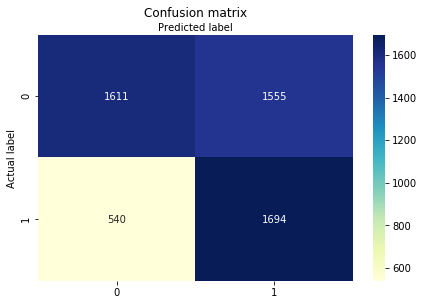

In [23]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy %0.4f" % accuracy_score(y_test, y_pred))

In [24]:
#Appliyng K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train,
                             y = y_train,
                             cv = 10)

# Showing Accuracies to validate the model estimation
accuracies

array([0.65995526, 0.66778523, 0.65380313, 0.63199105, 0.6442953 ,
       0.66331096, 0.6582774 , 0.65659955, 0.64597315, 0.64261745])

In [25]:
accuracies.mean()

0.6524608501118567

In [26]:
# Analyzing coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
          pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],
axis = 1)

,features,coef
0,user,-0.117347
1,age,-0.168296
2,deposits,0.448547
3,withdrawal,0.077879
4,purchases_partners,-0.724259
5,purchases,-0.603786
6,cc_taken,0.074629
7,cc_recommended,-0.003146
8,cc_disliked,0.003458
9,cc_liked,0.009891


In [27]:
### Feature selection ###

# how many columns we have on the X_train dataset?

X_train.shape


(17880, 42)

In [28]:
## Feature selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [29]:
# Model to test
classifier = LogisticRegression(solver = 'lbfgs')
# RFE(, N) the N is the Total Feature that we want to use for the clasification
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)


In [30]:
# sumarize the selection of the atributes
print(rfe.support_)

[ True  True  True  True  True  True  True False False False False False
  True  True  True  True False  True  True  True  True  True  True False
 False  True  True False False  True False False False False False False
 False False False False False False]


In [33]:
# show rfe columns names 
X_train.columns[rfe.support_]

Index(['user', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'web_user', 'ios_user', 'android_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'housing_R', 'payment_type_Bi-Weekly', 'payment_type_Weekly'],
      dtype='object')

In [35]:
# Model building with Feature Selection 
# Fitting Moel to the Traninig Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
# Evaluating Test set with feature selection
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

In [38]:
# Evaluating Result with feature selection
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cnf_matrix = confusion_matrix(y_test, y_pred)

Accuracy 0.6085


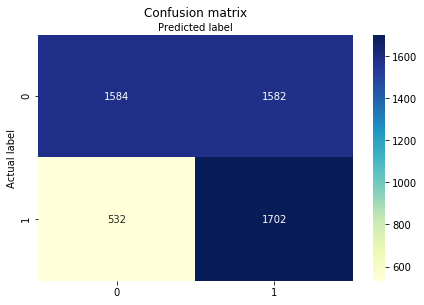

In [39]:
# cnf matrix drawing
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy %0.4f" % accuracy_score(y_test, y_pred))